### Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

In [10]:
x_b = np.c_[np.ones((100, 1)), x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[4.15732874],
       [2.9497884 ]])

In [11]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 4.15732874],
       [10.05690555]])

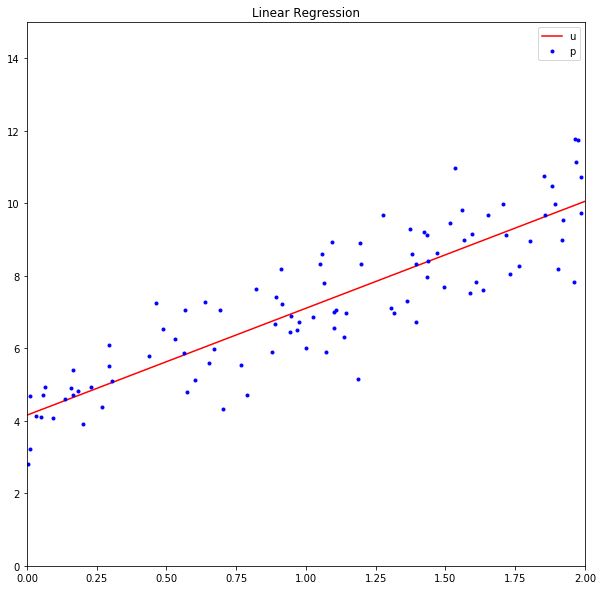

In [15]:
plt.figure(figsize=(10, 10))
plt.plot(x_new, y_predict, 'r-')
plt.plot(x, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend('upper left')
plt.title('Linear Regression')
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.15732874]), array([[2.9497884]]))

In [20]:
lin_reg.predict(x_new)

array([[ 4.15732874],
       [10.05690555]])

### Polynomial Regression(多项式回归)

In [21]:
m = 100
x = 6 * np.random.rand(m, 1) -3
y = 0.5 * x ** 2 + x + 2 + np.random.randn(m, 1)

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [24]:
x_poly = poly_features.fit_transform(x)
x[0], x_poly[0]

(array([-1.056504]), array([-1.056504  ,  1.11620069]))

将features 转化为 x 和 $x^2$, 然后用线性回归

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.92450262]), array([[1.01369615, 0.48562171]]))

In [34]:
lin_reg.predict([[-1.056504  ,  1.11620069]])

array([[1.39557987]])

In [35]:
x_space = np.linspace(-3, 3, 100)
y_space = [lin_reg.predict(poly_features.fit_transform(x))[0] for x in x_space]
x_space, y_space

(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
        -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
        -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
        -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
        -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
        -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
        -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
        -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
        -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
        -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
         0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
         0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
         0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
         0.93939394,  1.        ,  1.06060606,  1.1

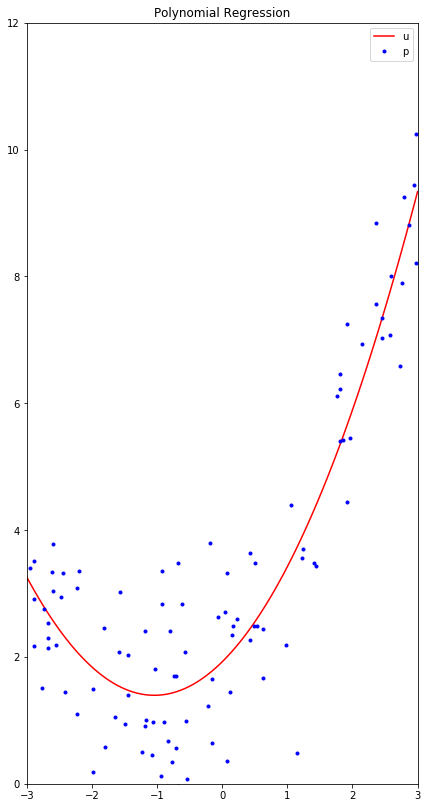

In [43]:
plt.figure(figsize=(7, 14))
plt.plot(x_space, y_space, 'r-')
plt.plot(x, y, 'b.')
plt.axis([-3, 3, 0, 12])
plt.legend('upper left')
plt.title('Polynomial Regression')
plt.show()

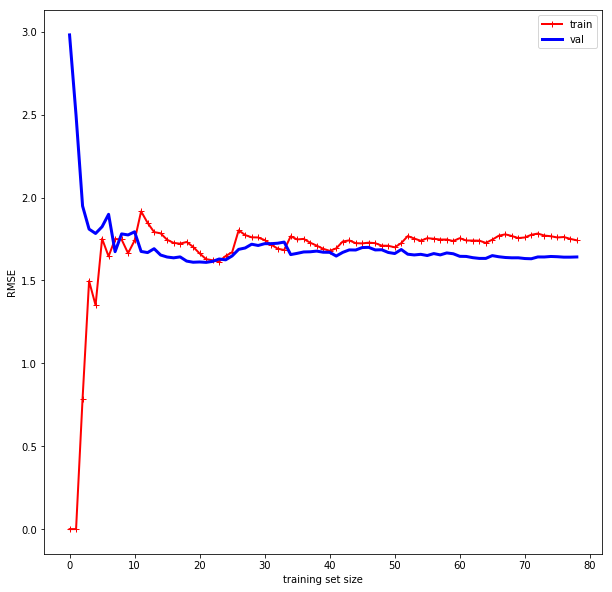

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.figure(figsize=(10, 10))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel('training set size')
    plt.ylabel('RMSE')
    plt.legend()

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

In [49]:
from sklearn.pipeline import Pipeline

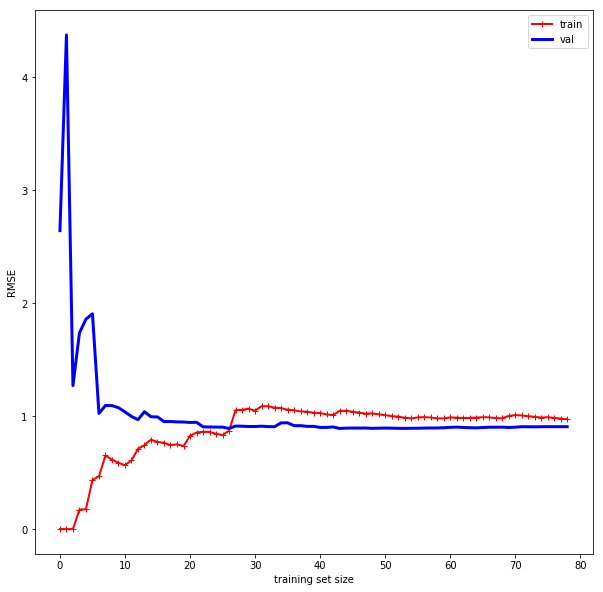

In [50]:
polynomial_regression = Pipeline((
    ('poly_features', poly_features),
    ('sgd_reg', LinearRegression()),
))

plot_learning_curves(polynomial_regression, x, y)

### Ridge Regression

Linear least squares with l2 regularization（带l2 regularization）

### Lasso Regression
Linear Model trained with L1 prior as regularizer (aka the Lasso)

### Elastic net 
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression

when should you use Linear Regression, Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

### Early Stopping

In [58]:
from sklearn.base import clone
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [54]:
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

In [57]:
x_train_poly, x_val_poly, y_train, y_val = train_test_split(x_poly, y, test_size=0.2)

In [59]:
minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(x_train_poly, y_train)
    y_val_predict = sgd_reg.predict(x_val_poly)
    val_err = mean_squared_error(y_val_predict, y_val)
    if val_err < minimum_val_error:
        minimum_val_error = val_err
        best_epoch = epoch
        best_model = clone(sgd_reg)

best_epoch

/home/kwrongkey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kwrongkey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kwrongkey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kwrongkey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

/home/kwrongkey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kwrongkey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kwrongkey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kwrongkey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

709

In [60]:
best_model

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=None, n_iter=1, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=True)